In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')

In [7]:
%matplotlib inline
df = pd.read_csv('data_stocks.csv')

In [8]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


<h3>Problem Statement:
Pick up the following stocks and generate forecasts accordingly
<pre>
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY
</pre>
</h3> Solution :
<b>To better handling the data we need to transform NASDAQ.AAPL column value to log value as we are going to log transformation method </b>

In [9]:
#create a new column
df["trans_AAPL"] = np.log(df["NASDAQ.AAPL"])

In [10]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,trans_AAPL
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449


In [11]:
from datetime import datetime

In [12]:
df["new_date"]= pd.to_datetime((df['DATE']),unit='s')

In [13]:
df["new_date"]

0       2017-04-03 13:30:00
1       2017-04-03 13:31:00
2       2017-04-03 13:32:00
3       2017-04-03 13:33:00
4       2017-04-03 13:34:00
5       2017-04-03 13:35:00
6       2017-04-03 13:36:00
7       2017-04-03 13:37:00
8       2017-04-03 13:38:00
9       2017-04-03 13:39:00
10      2017-04-03 13:40:00
11      2017-04-03 13:41:00
12      2017-04-03 13:42:00
13      2017-04-03 13:43:00
14      2017-04-03 13:44:00
15      2017-04-03 13:45:00
16      2017-04-03 13:46:00
17      2017-04-03 13:47:00
18      2017-04-03 13:48:00
19      2017-04-03 13:49:00
20      2017-04-03 13:50:00
21      2017-04-03 13:51:00
22      2017-04-03 13:52:00
23      2017-04-03 13:53:00
24      2017-04-03 13:54:00
25      2017-04-03 13:55:00
26      2017-04-03 13:56:00
27      2017-04-03 13:57:00
28      2017-04-03 13:58:00
29      2017-04-03 13:59:00
                ...        
41236   2017-08-31 19:31:00
41237   2017-08-31 19:32:00
41238   2017-08-31 19:33:00
41239   2017-08-31 19:34:00
41240   2017-08-31 1

In [14]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,trans_AAPL,new_date
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 13:34:00


In [15]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [16]:
sm.stats.durbin_watson(df["trans_AAPL"])

1.5195875753588083e-08

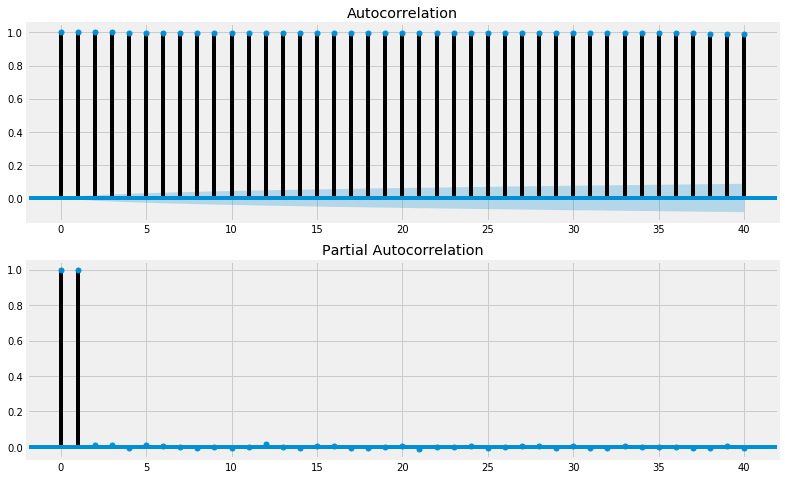

In [17]:
# show plots in the notebook - Auto coorelation plot
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["trans_AAPL"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["trans_AAPL"], lags=40, ax=ax2)

In [18]:
#convert the column into an array to perform faster processing
aapl_array=(df["trans_AAPL"].dropna().as_matrix())

In [19]:
aapl_arr=np.array(aapl_array[:1001])

In [20]:
aapl_arr

array([4.9675886 , 4.96772779, 4.9676589 , ..., 4.97976363, 4.97928222,
       4.97893821])

In [ ]:
model=ARIMA(aapl_arr,(2,2,2)).fit()#p=2 lag for AR model ,q=2 lag for MA model,d is difference

In [2]:
best_values=(0,0,0)
best_aic=1e20
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model=sm.tsa.ARIMA(aapl_array,(p,q,d)).fit()
                if model.aic < best_aic:
                    best.values=(p,q,d)
            except:
                pass